In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.0.0-rc0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.3042 - accuracy: 0.9109 - val_loss: 0.1454 - val_accuracy: 0.9561
Epoch 2/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.1469 - accuracy: 0.9558 - val_loss: 0.1036 - val_accuracy: 0.9693
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1100 - accuracy: 0.9680 - val_loss: 0.0922 - val_accuracy: 0.9723
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0889 - accuracy: 0.9722 - val_loss: 0.0814 - val_accuracy: 0.9747
Epoch 5/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0763 - accuracy: 0.9767 - val_loss: 0.0762 - val_accuracy: 0.9769
Epoch 6/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0682 - accuracy: 0.9785 - val_loss: 0.0692 - val_accuracy: 0.9788
Epoch 7/10
60000/60000 [==========================

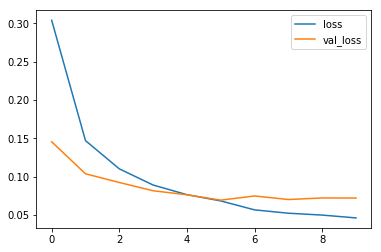

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

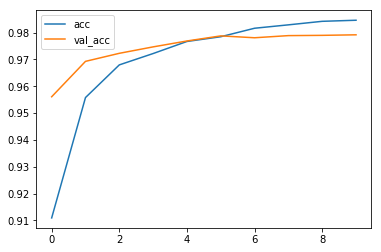

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [13]:
# Convert the model to TFLite format

# Create a converter object
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save to file
with open("converted_model.tflite", "wb") as f:
  f.write(tflite_model)

In [14]:
# Check if it exists
!ls

converted_model.tflite	keras_model.h5	sample_data
